In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import font_manager, rc

plt.rcParams['font.family'] = 'NanumGothic'


In [18]:
# 파일 불러오기
df = pd.read_csv('./2022-06-29_last_bab.csv')


# OVER VIEW

In [19]:
df.head()

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,미적용,0,110500,COMM,VBANK,개발자 커리어,2018-11-11 00:00:00
1,1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,미적용,0,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00
2,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
3,3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,미적용,0,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
4,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00


In [20]:
# overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              101102 non-null  int64 
 1   id                      101102 non-null  int64 
 2   customer_id             101102 non-null  int64 
 3   course_id               101102 non-null  int64 
 4   type                    101102 non-null  object
 5   state                   101102 non-null  object
 6   course_title            101102 non-null  object
 7   category_title          101102 non-null  object
 8   format                  101102 non-null  object
 9   completed_at            101102 non-null  object
 10  transaction_amount      101102 non-null  int64 
 11  coupon_title            101102 non-null  object
 12  coupon_discount_amount  101102 non-null  int64 
 13  sale_price              101102 non-null  int64 
 14  pg                      101102 non-n

> 101102 row , 13.94mb, no Nan data

In [21]:
# overview
df.describe()

,Unnamed: 0,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price
count,101102.000000,1.011020e+05,101102.000000,101102.000000,1.011020e+05,101102.000000,1.011020e+05
mean,50886.347708,1.145511e+06,415909.561997,208729.604815,1.286851e+05,14423.185199,1.592345e+05
std,29393.569867,1.125048e+05,206627.373238,21281.637839,1.299967e+05,35684.365000,1.147219e+05
min,0.000000,5.679930e+05,16.000000,2516.000000,-1.800000e+06,0.000000,0.000000e+00
25%,25411.250000,1.047142e+06,228975.000000,203146.000000,8.900000e+04,0.000000,1.100000e+05
50%,50899.500000,1.133842e+06,500265.500000,203787.000000,1.190000e+05,0.000000,1.340000e+05
75%,76337.750000,1.238848e+06,565941.000000,204870.000000,1.584000e+05,10000.000000,1.710000e+05
max,101817.000000,1.381657e+06,670896.000000,300000.000000,1.800000e+06,674000.000000,1.800000e+06


# 매출 분석

## 매출 정의

> 매출은 'type' 컬럼의 값이 'PAYMENT' 또는 'REFUND' 이면서 'state' 컬럼의 값이 'COMPLETED' 인 값들의 합으로 정의

### 총 매출 구하기

In [22]:
# completed_at 컬럼 타입을 datetime으로 변경
df['completed_at'] = pd.to_datetime(df['completed_at'])

In [23]:
# completed_at 을 인덱스로 설정
df.set_index('completed_at').head()

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
completed_at,,,,,,,,,,,,,,,,,
2021-03-28 15:00:11,0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,90500,미적용,0,110500,COMM,VBANK,개발자 커리어,2018-11-11 00:00:00
2021-03-28 15:16:53,1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,미적용,0,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00
2021-03-28 15:21:43,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
2021-03-28 15:21:43,3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,미적용,0,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
2021-03-28 15:21:54,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00


In [24]:
((df.type == 'PAYMENT') & (df.type == 'REFUND') & (df.state == 'COMPLETED'))

0         False
1         False
2         False
3         False
4         False
          ...  
101097    False
101098    False
101099    False
101100    False
101101    False
Length: 101102, dtype: bool

In [25]:
# 매출 계산에 필요한 값 가져오기
pay_com = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]  # payment 변수
re_com = df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]  # refund 변수

In [26]:
# 데이터 2개 합치기
rev = pd.concat([pay_com,re_com])
rev  

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
2,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
4,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00
8,8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00
10,10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,미적용,0,263000,COMM,CARD,부동산/금융,2020-11-27 00:00:00
14,14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,111000,COMM,CARD,프론트엔드 개발,2021-02-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100866,101582,1363708,600073,206065,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,미적용,0,179000,NAVER,CARD,백엔드 개발,2021-07-15 00:00:00
100870,101586,1363721,645911,300000,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,미적용,0,1400000,INICIS,CARD,마케팅,2018-11-11 00:00:00
100895,101611,1363934,506356,206720,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,미적용,0,259000,NAVER,CARD,영상 편집,2021-08-17 00:00:00
100933,101649,1364149,604077,205569,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,미적용,0,129000,KAKAO,POINT,엑셀/VBA,2021-08-17 00:00:00


In [27]:
# 총 매출 구하기
rev.transaction_amount.sum()

5972719534

In [28]:
# 결제가 일어난 첫번쨰 시간
rev.completed_at.min()

Timestamp('2021-03-28 15:21:43')

In [29]:
# 결제가 일어난 마지막 시간
rev.completed_at.max()

Timestamp('2021-09-25 14:25:47')

> 2021-03-28 ~ 2021-09-25 까지 Fast Campus B2C 매출은 6,571,636,960원 입니다.

### 시간대별 매출

In [30]:
# lambda 함수를 이용해 시간만 뽑아서 그룹핑
rev_by_hour = rev.set_index('completed_at').groupby(lambda date: date.hour).sum()[['transaction_amount']]
rev_by_hour

,transaction_amount
completed_at,
0,233549455
1,136075550
2,95817755
3,52194135
4,33338600
5,36766265
6,55248680
7,94951875
8,155896900


### 시간대별 매출 Line Graph

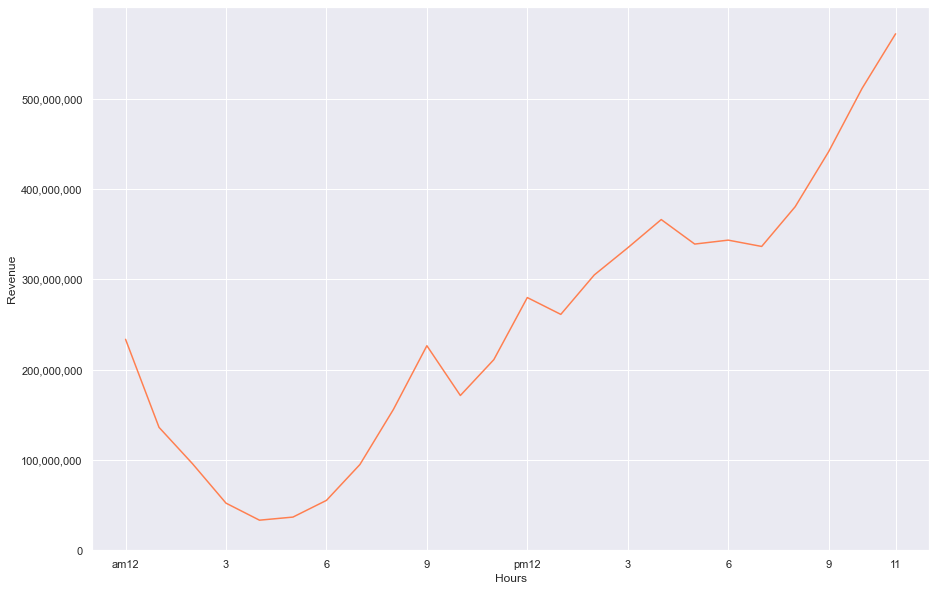

In [31]:
# 시각화

plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

sns.lineplot(x='completed_at', y='transaction_amount',
             data=rev_by_hour,
             color = 'coral'
            )
plt.xlabel('Hours')
plt.ylabel('Revenue')
plt.yticks([0, 100000000, 200000000, 300000000, 400000000 ,500000000], [0, '100,000,000', '200,000,000', '300,000,000', '400,000,000' ,'500,000,000'])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21 ,23], ['am12', '3', '6', '9', 'pm12', '3', '6', '9', '11'])
plt.xlim([-1, 24])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 601732315])     # Y축의 범위: [ymin, ymax]
plt.show()

>  저녁시간대 부터 자정까지 매출비중이 높은것을 알 수 있음.

### 시간대별 매출 Pie Graph

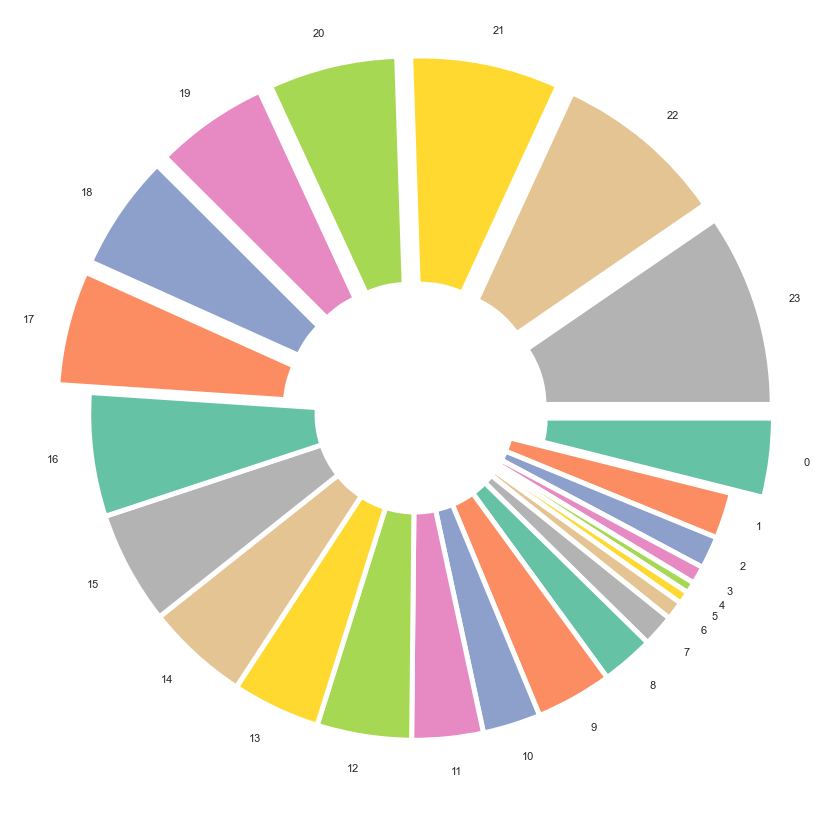

In [32]:
labels = [i for i in range(0,24)]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = sns.color_palette("Set2")
explode = [0.10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]

plt.figure(figsize=(15,15))
plt.pie(rev_by_hour.transaction_amount,
        labels = labels,
        counterclock=False,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors
       
       
       )
plt.show()

> 파이 차트를 살펴보면 오후 5시부터 자정까지 7시강동안의 매출이 전체매출의 50% 이상을 차지하는것을 알 수 있음.


### 요일별 매출 그래프


In [33]:
# lambda 함수를 이용해 요일만 뽑아서 그룹핑
rev_by_dow = rev.set_index('completed_at').groupby(lambda dow: dow.dayofweek).sum()[['transaction_amount']]
rev_by_dow

,transaction_amount
completed_at,
0,794476420
1,859965425
2,902670063
3,708513498
4,819967968
5,737461545
6,1149664615


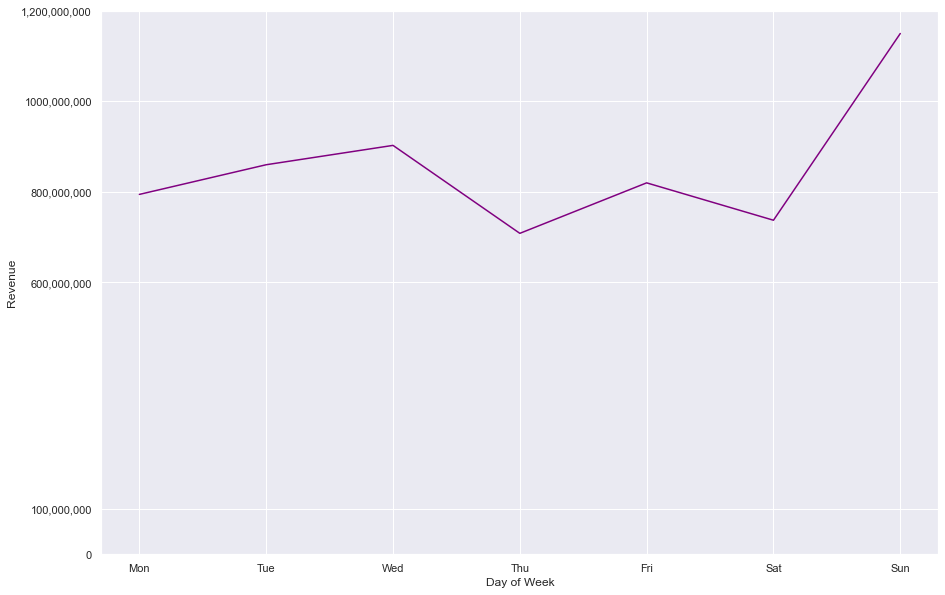

In [34]:
# 시각화

plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

sns.lineplot(x='completed_at', y='transaction_amount',
             data=rev_by_dow,
             color = 'purple'
            )
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.yticks([0, 100000000, 600000000, 800000000, 1000000000 ,1200000000], 
           ['0','100,000,000', '600,000,000', '800,000,000', '1,000,000,000' ,'1,200,000,000'])
plt.xticks([i for i in range(0,7)], 
           ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()

> 요일별 매출을 분석해보면 일요일 매출이 가장높고 토요일 매출이 가장낮지만 요일별 편차가 크지 않은것을 알 수 있음.

### 요일별 매출 Pie Graph

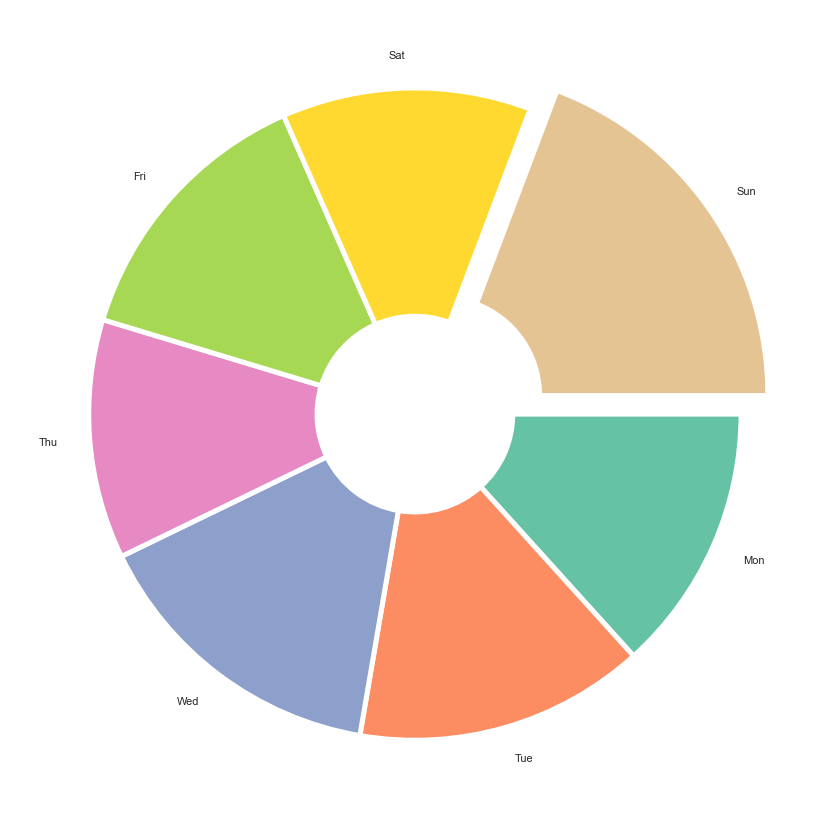

In [35]:
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0, 0, 0, 0, 0, 0, 0.10]
colors = sns.color_palette("Set2")

plt.figure(figsize=(15,15))
plt.pie(rev_by_dow.transaction_amount,
        labels = labels,
        counterclock=False,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors

       
       
       )
plt.show()

> 파이 차트를 이용해 요일별 편차 정도를 좀 더 직관적으로 확인할 수 있음

### 일별 매출 그래프

In [36]:
rev['completed_ymd'] = rev['completed_at'].dt.strftime("%Y-%m-%d")
rev

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,completed_ymd
2,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00,2021-03-28
4,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00,2021-03-28
8,8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00,2021-03-28
10,10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,미적용,0,263000,COMM,CARD,부동산/금융,2020-11-27 00:00:00,2021-03-28
14,14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,111000,COMM,CARD,프론트엔드 개발,2021-02-02 00:00:00,2021-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100866,101582,1363708,600073,206065,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,미적용,0,179000,NAVER,CARD,백엔드 개발,2021-07-15 00:00:00,2021-09-24
100870,101586,1363721,645911,300000,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,미적용,0,1400000,INICIS,CARD,마케팅,2018-11-11 00:00:00,2021-09-24
100895,101611,1363934,506356,206720,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,미적용,0,259000,NAVER,CARD,영상 편집,2021-08-17 00:00:00,2021-09-24
100933,101649,1364149,604077,205569,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,미적용,0,129000,KAKAO,POINT,엑셀/VBA,2021-08-17 00:00:00,2021-09-24


In [37]:
rev_days = rev.groupby('completed_ymd')['transaction_amount'].sum()
rev_days

completed_ymd
2021-03-28    36101770
2021-03-29    33008733
2021-03-30    38159694
2021-03-31    85210797
2021-04-01    22195955
                ...   
2021-09-21    24661500
2021-09-22    57519650
2021-09-23     8979352
2021-09-24    32536684
2021-09-25    12418000
Name: transaction_amount, Length: 182, dtype: int64

In [38]:
rev_days.max()

171149483

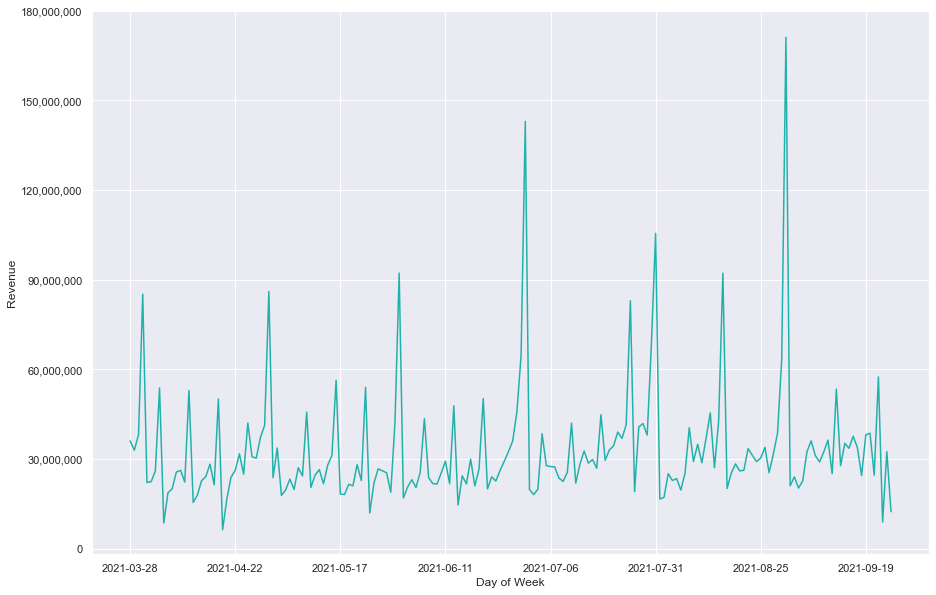

In [39]:
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

rev_days.plot(color='#20B2AA')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.yticks([0, 30000000, 60000000, 90000000, 120000000, 150000000 ,180000000], 
           ['0','30,000,000','60,000,000', '90,000,000', '120,000,000', '150,000,000' ,'180,000,000'])
plt.show()

매출이 월말에 집중되는 경향이있음.

### 일자별 매출 그래프

In [40]:
# lambda 함수를 이용해 일만 뽑아서 그룹핑
rev_by_days = rev.set_index('completed_at').groupby(lambda day: day.day).sum()[['transaction_amount']]
rev_by_days

,transaction_amount
completed_at,
1,120656529
2,136319725
3,132405593
4,178228365
5,141387104
6,165539322
7,154945359
8,165210479
9,177890909


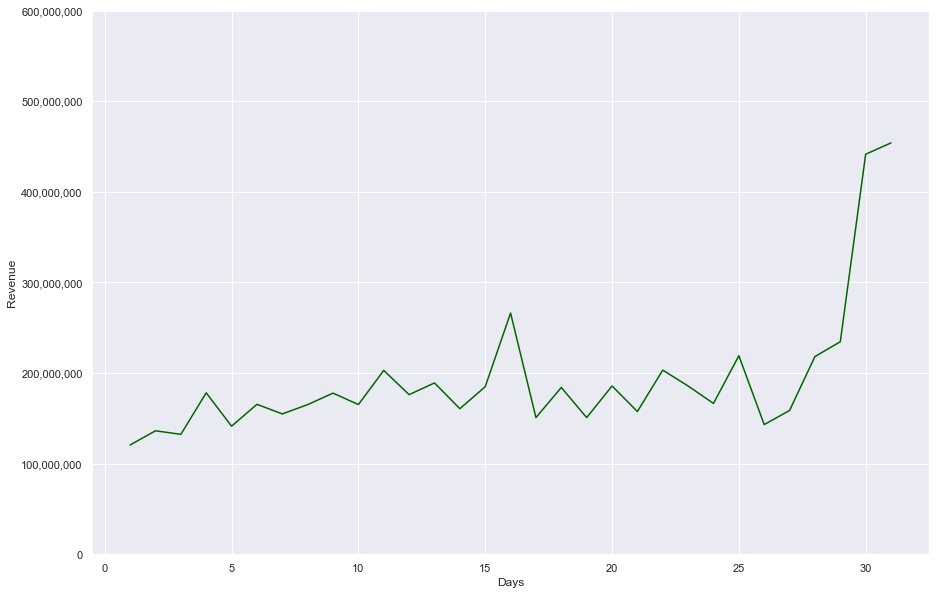

In [41]:
# 시각화

plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

sns.lineplot(x='completed_at', y='transaction_amount',
             data=rev_by_days,
             color = 'darkgreen'
            )
plt.xlabel('Days')
plt.ylabel('Revenue')
plt.yticks([0, 100000000, 200000000, 300000000, 400000000, 500000000 ,600000000], 
           ['0','100,000,000','200,000,000', '300,000,000', '400,000,000', '500,000,000' ,'600,000,000'])
# plt.xticks([i for i in range(0,7)], 
#            ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()

> 일별 매출에서 확인한바와 같이 매출이 월말에 집중되는 경향을 확인할 수 있음.

### 주별 매출 그래프

In [42]:
# lambda 함수를 이용해 주단위로 데이터 뽑기
rev_by_weeks = rev.set_index('completed_at').groupby(lambda week: week.week).sum()[['transaction_amount']]
rev_by_weeks

C:\Users\user\AppData\Local\Temp\ipykernel_1612\1269196048.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  rev_by_weeks = rev.set_index('completed_at').groupby(lambda week: week.week).sum()[['transaction_amount']]


,transaction_amount
completed_at,
12,36101770
13,280902095
14,174836172
15,180461592
16,172120121
17,283422726
18,178097029
19,209188129
20,184205414


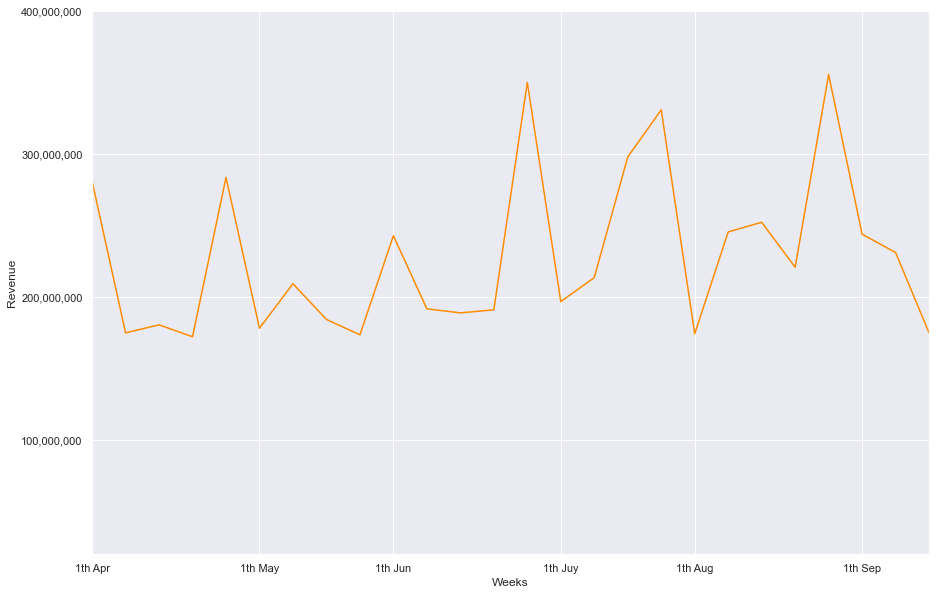

In [43]:
# 시각화

plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

sns.lineplot(x='completed_at', y='transaction_amount',
             data=rev_by_weeks,
             color = '#FF8C00'
            )
plt.xlabel('Weeks')
plt.ylabel('Revenue')
plt.yticks([ 100000000, 200000000, 300000000 ,400000000], 
           ['100,000,000','200,000,000', '300,000,000', '400,000,000',])
plt.xlim(13,38)
plt.xticks([13, 18,22,27,31, 36], 
           ['1th Apr', '1th May', '1th Jun', '1th Juy', '1th Aug', '1th Sep'])

plt.show()

> 월별 마지막 주에 매출이 급증하고 월초엔 매출이 급감하는 패턴이 확인됨.

### 월별 매출 그래프

In [44]:
# lambda 함수를 이용해 월단위로 데이터 뽑기
rev_by_month = rev.set_index('completed_at').groupby(lambda month: month.month).sum()[['transaction_amount']]
rev_by_month_df = pd.DataFrame(rev_by_month)
rev_by_month_df

,transaction_amount
completed_at,
3,192480994
4,877810402
5,894742767
6,975246992
7,1118391039
8,1143731388
9,770315952


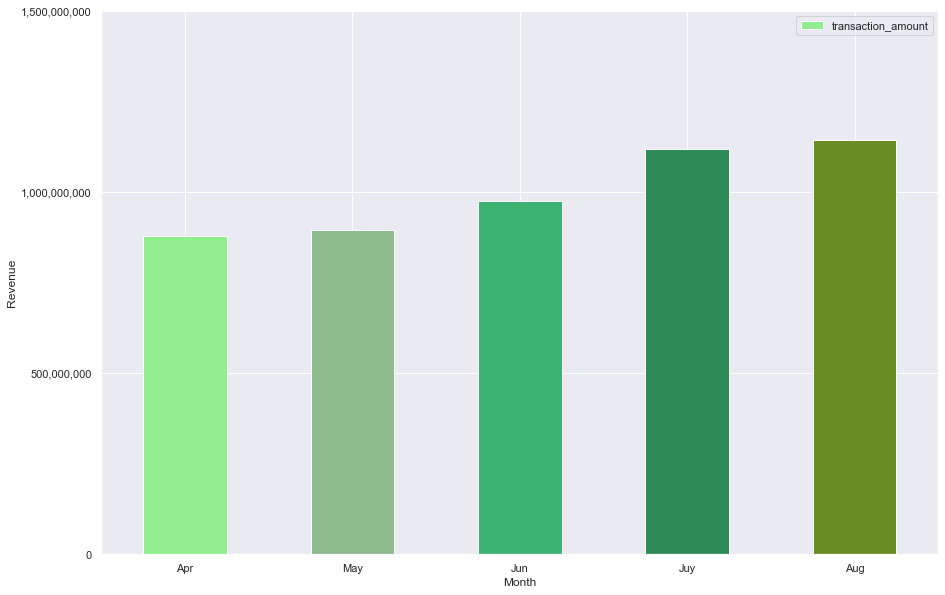

In [46]:
# 시각화

sns.set_theme(style="darkgrid")
my_colors = ['#90EE90', '#90EE90', '#8FBC8F','#3CB371', '#2E8B57', '#6B8E23']

rev_by_month_df.plot.bar(y='transaction_amount',
                         rot=0,
                         color=my_colors,
                         figsize=(15,10))

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.yticks([ 0, 500000000, 1000000000 ,1500000000], 
           ['0','500,000,000', '1,000,000,000', '1,500,000,000',])
plt.xlim(0.5,5.5)
plt.xticks([1, 2, 3 ,4 ,5 ], 
           ['Apr', 'May', 'Jun', 'Juy', 'Aug'])

plt.show()

> 점진적으로 매출이 증가하고 있음.
> *** 3월, 9월 매출은 데이터가 누락되었기 때문에 제외 

# 강의 분석

## 전체 강의 수

In [72]:
(rev.course_title.value_counts() > 0).sum()

584

> 전체 강의 수 584 개

In [ ]:
rev_course_du_drop = rev.drop_duplicates('course_title')
rev_course_du_drop

> 'course_title' 컬럼의 강의 타이틀 중복데이터 제거

In [123]:
# 'course_title'에 프로모션이 포함된 데이터 카운팅
pro_courses = rev_course_du_drop.course_title.str.contains('프로모션')
pro_courses.sum()

270

> 프로모션 강의 수 270개

In [126]:
ofc_courses = ~pro_courses
ofc_courses.sum()

314

> 프로모션이 아닌 정식강의 수 314 개

##  TOP 10 강의

### 판매수 TOP 10 강의

In [172]:
# Top 10 강의 판매건 수 
course_sales_count = rev[rev.type == 'PAYMENT'].course_title.value_counts()
pd.DataFrame(course_sales_count)[:10]

,course_title
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,1418
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,1405
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,1203
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,1054
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,813
나의 칼퇴치트키 엑셀유치원,788
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,684
초격차 패키지 : 한번에 끝내는 디자인 툴,664
초격차 패키지 : 한 번에 끝내는 엑셀 실무,656
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential,646


|순위|강의명|판매건수
|:---:|------|:---:|
|1|초격차 패키지 : 한 번에 끝내는 프론트엔드 개발|	1418|
|2|초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터|	1405|
|3|초격차 패키지 : 한번에 끝내는 영상 촬영과 편집|	1203|
|4|The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법|	1054|
|5|초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍|	813|
|6|나의 칼퇴치트키 엑셀유치원|	788|
|7|올인원 패키지 : star741의 캐주얼 일러스트 드로잉|	684|
|8|초격차 패키지 : 한번에 끝내는 디자인 툴|	664|
|9|올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential|	656|
|10|초격차 패키지 : 한 번에 끝내는 엑셀 실무|	646|

### 매출액 TOP 10 강의

In [177]:
# Top 10 강의 판매건 수 
course_rev = rev.groupby('course_title').sum()['transaction_amount'].sort_values(ascending=False)
course_rev = pd.DataFrame(course_rev)
course_rev[:10]

,transaction_amount
course_title,
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,151049741
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,141248845
올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,129821723
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,116614335
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,108576441
나의 칼퇴치트키 엑셀유치원,88201167
초격차 패키지 : 한번에 끝내는 디자인 툴,87700764
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,84763815
올인원 패키지 : 완전정복 시각디자인 기초,82131657


|순위|강의명|매출액|
|:---:|------|:---:|
|1|The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법	|151,049,741|
|2|초격차 패키지 : 한 번에 끝내는 프론트엔드 개발	|141,248,845|
|3|올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략	|129,821,723|
|4|초격차 패키지 : 한번에 끝내는 영상 촬영과 편집	|116,614,335|
|5|초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터	|108,576,441|
|6|나의 칼퇴치트키 엑셀유치원	|88,201,167|
|7|초격차 패키지 : 한번에 끝내는 디자인 툴	|87,700,764|
|8|올인원 패키지 : star741의 캐주얼 일러스트 드로잉	|84,763,815|
|9|올인원 패키지 : 완전정복 시각디자인 기초	|82,131,657|
|10|초격차 패키지 : 한번에 끝내는 UX/UI 디자인	|80,602,968|


### 강의당 평균 매출 금액

In [205]:
course_rev_plus = course_rev[course_rev > 0].dropna()
course_rev_plus = course_rev_plus.astype('int')
course_rev_plus.describe()

,transaction_amount
count,5.470000e+02
mean,1.093490e+07
std,1.858718e+07
min,1.000000e+04
25%,1.320000e+06
50%,3.588000e+06
75%,1.202847e+07
max,1.510497e+08


> 강의당 평균 매출금액 10,934,900원

### TOP 10 강의 평균 매출 금액

In [208]:
course_rev_plus[:10].mean()

transaction_amount    107071145.6
dtype: float64

> TOP 10 강의 평균 매출금액은 107,071,145 원으로 전체 평균과 약 9.8배 차이.

### 환불 TOP 10 강의

In [174]:
# 매출 Top 10 강의 환불건 수 
course_rf = rev[rev.type == 'REFUND'].course_title.value_counts()
pd.DataFrame(course_rf)[:10]

,course_title
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,121
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,105
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,68
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,65
초격차 패키지 : 한번에 끝내는 디자인 툴,64
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin,63
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,60
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,57
올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리미어프로 베이직,55
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential,53


|순위|강의명|환불건수|
|:---:|------|:---:|
|1|초격차 패키지 : 한 번에 끝내는 프론트엔드 개발	|121|
|2|초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터	|105|
|3|초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍	|68|
|4|올인원 패키지 : star741의 캐주얼 일러스트 드로잉	|65|
|5|초격차 패키지 : 한번에 끝내는 디자인 툴	|64|
|6|초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin	|63|
|7|초격차 패키지 : 한번에 끝내는 영상 촬영과 편집	|60|
|8|The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법	|57|
|9|올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리미어프로 베이직	|55|
|10|올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential	|53|

In [209]:
course_rev

,transaction_amount
course_title,
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,151049741
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,141248845
올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,129821723
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,116614335
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,108576441
...,...
디지털 마케팅 온라인 완주반 3기,-575000
코딩+알고리즘 온라인 완주반 5기,-810000
모션그래픽 포트폴리오 온라인 완주반 1기,-1144000


In [160]:
course_rev_rev.groupby('course_title').sum()['transaction_amount'].sort_values(ascending=False)[:10]

course_title
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법           151049741
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                      141248845
올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략    129821723
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                      116614335
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터           108576441
나의 칼퇴치트키 엑셀유치원                                    88201167
초격차 패키지 : 한번에 끝내는 디자인 툴                           87700764
올인원 패키지 : star741의 캐주얼 일러스트 드로잉                   84763815
올인원 패키지 : 완전정복 시각디자인 기초                           82131657
초격차 패키지 : 한번에 끝내는 UX/UI 디자인                       80602968
Name: transaction_amount, dtype: int64

In [ ]:
rev.groupby.course_title.sum()['']

In [212]:
rev.groupby('course_title')

C:\Users\user\anaconda3\envs\datascience\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


TypeError: unhashable type: 'DataFrame'

In [77]:
course_top_df = pd.DataFrame(rev.course_title.value_counts()[:10])
course_top_df

,course_title
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,1539
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,1510
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,1263
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,1111
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,881
나의 칼퇴치트키 엑셀유치원,824
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,749
초격차 패키지 : 한번에 끝내는 디자인 툴,728
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential,699
초격차 패키지 : 한 번에 끝내는 엑셀 실무,687


In [70]:
rev_course_du_drop.course_title.value_counts().sum()

584

## 전체 카테고리 수

## 가장많은(적은) 매출을 올린 강의 및 탑 10강의 매출추이

### 매출 상위 1~10위 까지의  강의  목록 

### 매출 상위 1~10위 강의 매출 추이 그래프(6개월간)

### 매출 하위 1~10위 강의목록

### 매출 하위 1~10위 강의 매출 추이 그래프(6개월간)

## 가장많은(적은) 매출을 올린 카테고리 탑 10카테고리 매출추이

### 매출 상위 1~10위 까지의  카테고리  목록

### 매출 상위 1~10위 카테고리 매출 추이 그래프(6개월간)

### 매출 하위 1~10위 카테고리목록

### 매출 하위 1~10위 카테고리 매출 추이 그래프(6개월간)

# 수강 신청 행동 패턴 분석

## cancelled 가장 많은 강좌(구매가 많은게 환불이 많은가? 주의)

### 취소가 많은  1~20위 까지의  강의  목록(cancelled)

### 취소가 가장 적은 1~20위 강의 목록

### 환불이 많은  1~20위 까지의  강의  목록(refund)

### 환불률이 가장 적은 1~20위 강의 목록

### 구매률과 환불률의 상관관계

# PG사 목록

## 기존 PG사 vs 신규 pg사 점유율 현황

### 기존 PG사 vs 신규 pg사 기간별 점유율 변동 변화추이

# VIP그룹 분석

## VIP 그룹 정의

## 일반 고객 평균 결제 횟수 vs VIP 고객 평균 결제 횟수

## VIP 그룹 특징

# 쿠폰 사용 분석

## 전체구매건 중 쿠폰사용한 구매비율

## 매출에 대한 쿠폰의 중요도 분석

# 패키지 강의 vs 단품 강의

# 레드는 과연 성공했는가?